In [1]:
# # the imports in this cell are required when running on local device
# import os, sys
# sys.path.append(os.path.join('..', '..'))
# from utils.applyML_util import train_regression, eval_regression
# from utils.featureSelection_util import (pearson_correlation_fs, 
#                                          seleckKBest_fs, selectSequential_fs)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# the imports in this cell are required when running from Cloud (Colab/Kaggle)
# before running on cloud you nee to upload the .py files 
# from 'Notebooks/utils' directory
from applyML_util import train_regression, eval_regression, showEvalutationGraph_regression
from featureSelection_util import (pearson_correlation_fs, 
                                   seleckKBest_fs, selectSequential_fs)

**SVR Documentation link:** https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVR

In [5]:
# global random seed
RAND_SEED = 42

# initial model with only random seed and not any hyper-parametes
initial_model = SVR()

# hyper-parameters
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [3,4,5]
epsilon = [0.5]
c_values = [0.5,2,3,4,5,6,7]

# dictonary of all hyperparameters
param_grid = {'kernel': kernel,'C': c_values, 'epsilon': epsilon, 'degree': degree}

# variables needed for showEvalGraph_regression() function
MODEL_CLASS = SVR
x_axis_param_name = 'C'
x_axis_vals = c_values

## 1. Experimentation on the Weather Daily dataset

In [6]:
# Load the train dataset
weather_daily_train_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/train/brri-weather_train_regression.csv')

# Load the test set
weather_daily_test_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/test/brri-weather_test_regression.csv')

In [7]:
# train model
model, selected_hyperparams, train_r2, train_mae, train_rmse = train_regression(initial_model, param_grid, weather_daily_train_df, cls='Rainfall (mm)')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: r2-score={train_r2}, mae={train_mae}, rmse={train_rmse}')

Selected hyperparameters: {'C': 7, 'degree': 5, 'epsilon': 0.5, 'kernel': 'poly'}
Train set performance: r2-score=0.1935, mae=5.2272, rmse=13.4724


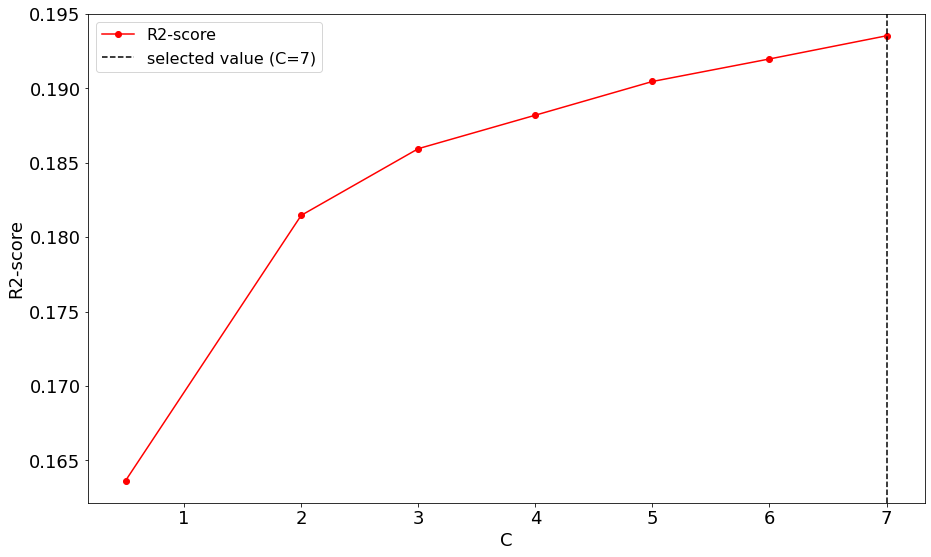

In [8]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
#selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_regression(MODEL_CLASS, weather_daily_train_df, cls='Rainfall (mm)', 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_vals, 
                                selected_model_params=selected_model_params)

In [9]:
# test model
test_r2, test_mae, test_rmse = eval_regression(model, weather_daily_test_df, cls='Rainfall (mm)')
# performance on the test set
print(f'Test set performance: r2-score={test_r2}, mae={test_mae}, rmse={test_rmse}')

Test set performance: r2-score=0.1062, mae=5.5676, rmse=16.347


### 1.1 Apply Pearson Feature Selection to Daily Weather Dataset

In [10]:
# select features from the train dataset
weather_daily_fs1_train_df, cols_to_drop = pearson_correlation_fs(weather_daily_train_df, 'Rainfall (mm)')

# keep only selected features on the test dataset
weather_daily_fs1_test_df = weather_daily_test_df.drop(columns=cols_to_drop)

dropping Sunshine (hour/day) from (Cloudy (hour/day), Sunshine (hour/day))


In [11]:
# train model
model, selected_hyperparams, train_r2, train_mae, train_rmse = train_regression(initial_model, param_grid, weather_daily_fs1_train_df, cls='Rainfall (mm)')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: r2-score={train_r2}, mae={train_mae}, rmse={train_rmse}')

Selected hyperparameters: {'C': 7, 'degree': 5, 'epsilon': 0.5, 'kernel': 'poly'}
Train set performance: r2-score=0.1874, mae=5.2264, rmse=13.521


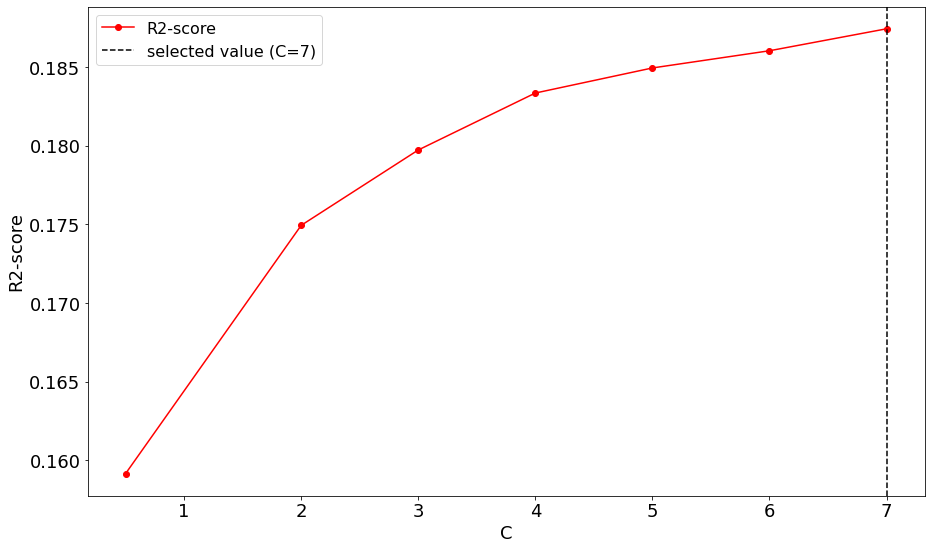

In [12]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
#selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_regression(MODEL_CLASS, weather_daily_fs1_train_df, cls='Rainfall (mm)', 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_vals, 
                                selected_model_params=selected_model_params)

In [13]:
# test model
test_r2, test_mae, test_rmse = eval_regression(model, weather_daily_fs1_test_df, cls='Rainfall (mm)')
# performance on the test set
print(f'Test set performance: r2-score={test_r2}, mae={test_mae}, rmse={test_rmse}')

Test set performance: r2-score=0.1019, mae=5.573, rmse=16.3867


### 1.2 Apply SelectKBest Feature Selection to Daily Weather Dataset

In [14]:
# select features from the train dataset
weather_daily_fs2_train_df, cols_to_drop = seleckKBest_fs(weather_daily_train_df, 'Rainfall (mm)', is_regression=True)

print('features dropped:', cols_to_drop)

# keep only selected features on the test dataset
weather_daily_fs2_test_df = weather_daily_test_df.drop(columns=cols_to_drop)

features dropped: ['Max Temp. (degree Celcius)', 'Solar Radiation (cal/cm^2/day)']


In [15]:
# train model
model, selected_hyperparams, train_r2, train_mae, train_rmse = train_regression(initial_model, param_grid, weather_daily_fs2_train_df, cls='Rainfall (mm)')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: r2-score={train_r2}, mae={train_mae}, rmse={train_rmse}')

Selected hyperparameters: {'C': 7, 'degree': 5, 'epsilon': 0.5, 'kernel': 'poly'}
Train set performance: r2-score=0.1877, mae=5.2412, rmse=13.5195


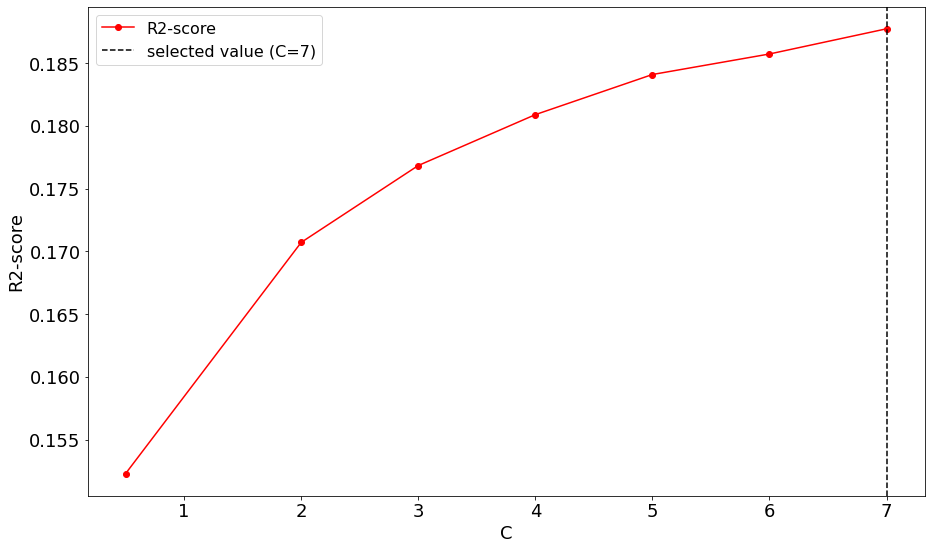

In [16]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
#selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_regression(MODEL_CLASS, weather_daily_fs2_train_df, cls='Rainfall (mm)', 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_vals, 
                                selected_model_params=selected_model_params)

In [17]:
# test model
test_r2, test_mae, test_rmse = eval_regression(model, weather_daily_fs2_test_df, cls='Rainfall (mm)')
# performance on the test set
print(f'Test set performance: r2-score={test_r2}, mae={test_mae}, rmse={test_rmse}')

Test set performance: r2-score=0.1088, mae=5.5575, rmse=16.3229


### 1.3 Apply SelectSequential Feature Selection to Daily Weather Dataset

In [18]:
# select features from the train dataset
weather_daily_fs3_train_df, cols_to_drop = selectSequential_fs(weather_daily_train_df, 'Rainfall (mm)', is_regression=True)

print('features dropped:', cols_to_drop)

# keep only selected features on the test dataset
weather_daily_fs3_test_df = weather_daily_test_df.drop(columns=cols_to_drop)

features dropped: ['Actual Evaporation (mm)', 'Relative Humidity (morning, %)']


In [19]:
# train model
model, selected_hyperparams, train_r2, train_mae, train_rmse = train_regression(initial_model, param_grid, weather_daily_fs3_train_df, cls='Rainfall (mm)')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: r2-score={train_r2}, mae={train_mae}, rmse={train_rmse}')

Selected hyperparameters: {'C': 7, 'degree': 5, 'epsilon': 0.5, 'kernel': 'poly'}
Train set performance: r2-score=0.185, mae=5.2532, rmse=13.5431


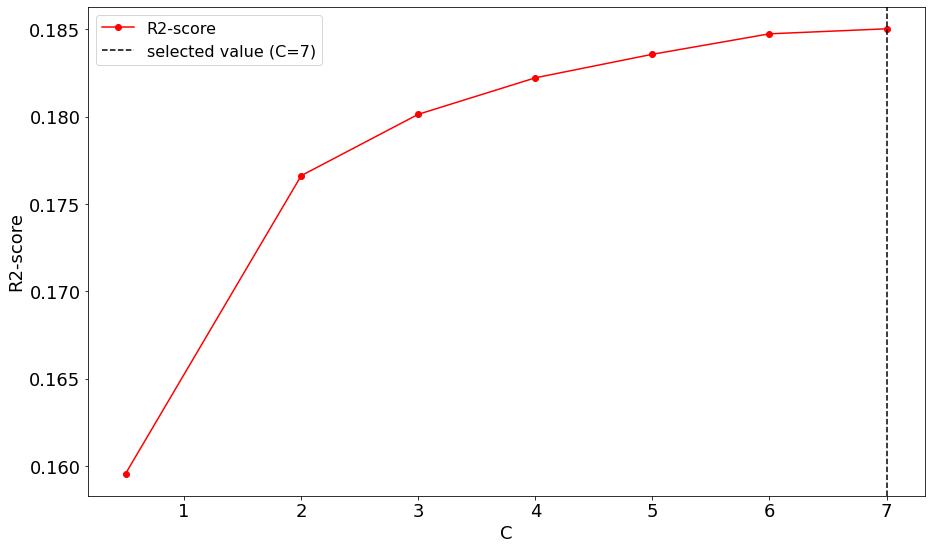

In [20]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
#selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_regression(MODEL_CLASS, weather_daily_fs3_train_df, cls='Rainfall (mm)', 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_vals, 
                                selected_model_params=selected_model_params)

In [21]:
# test model
test_r2, test_mae, test_rmse = eval_regression(model, weather_daily_fs3_test_df, cls='Rainfall (mm)')
# performance on the test set
print(f'Test set performance: r2-score={test_r2}, mae={test_mae}, rmse={test_rmse}')

Test set performance: r2-score=0.091, mae=5.6512, rmse=16.4853
